## Project Overview

- The objective is to predict the **median_house_value** based on various features like location, population, and other housing-related factors.
- The aim is to understand how different factors, such as proximity to the ocean or median income, influence house prices. This can support data-driven decisions in housing investments or urban planning.

### 1. Target Variable (continuous):
- **median_house_value**

### 2. Predictor Variables:
- **Categorical**:
  - ocean_proximity
- **Continuous**:
  - longitude
  - latitude
  - housing_median_age
  - total_rooms
  - total_bedrooms
  - population
  - households  - median_income
median_income

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib  inline 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
house = pd.read_csv('housing.csv')

# EDA

In [5]:
type(house)

pandas.core.frame.DataFrame

In [6]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [7]:
house.shape

(20640, 10)

In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [9]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
house.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [11]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [12]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

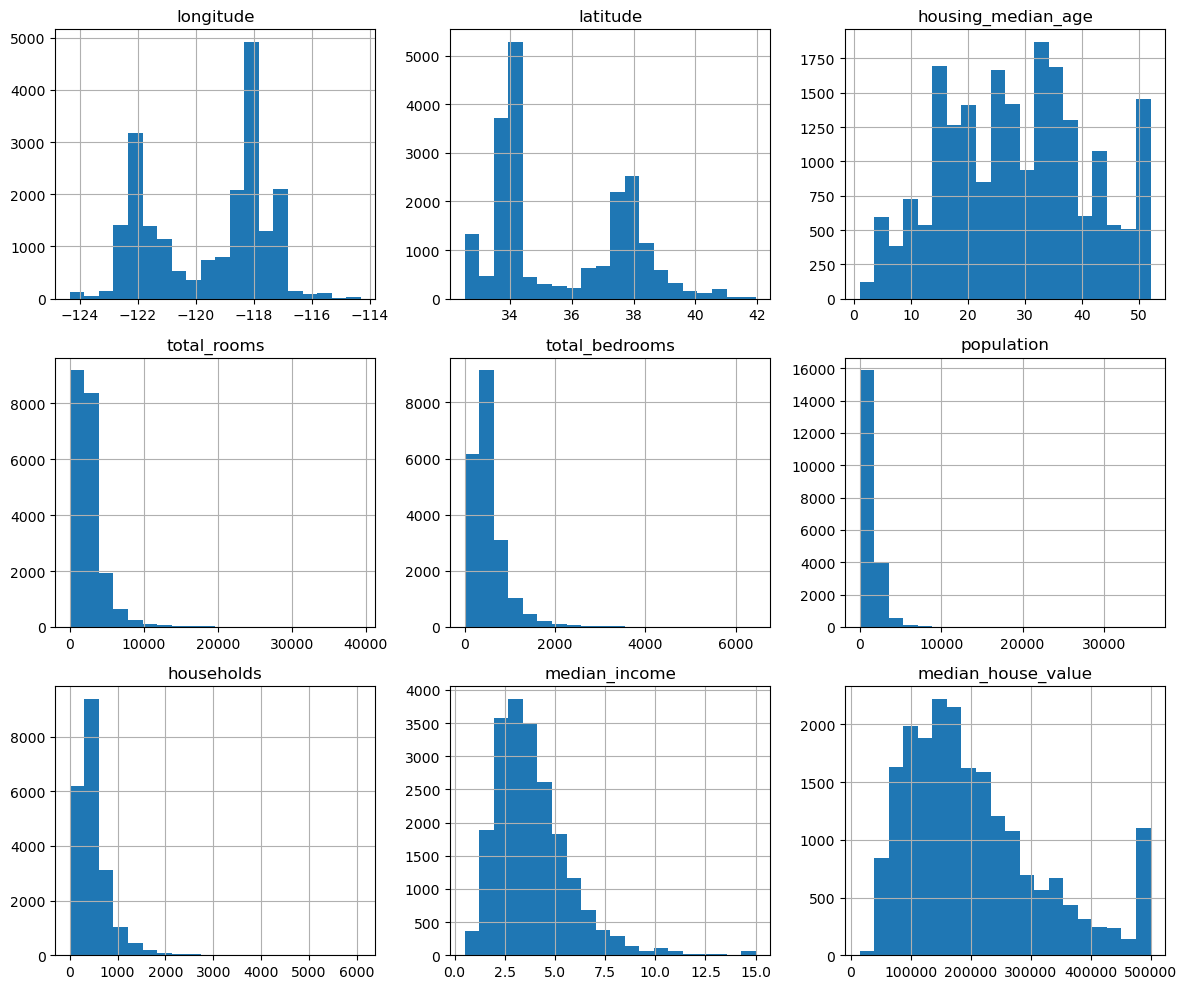

In [13]:
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                     'total_bedrooms', 'population', 'households', 'median_income', 
                     'median_house_value']

# Plot histograms for numerical columns
house[numerical_columns].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

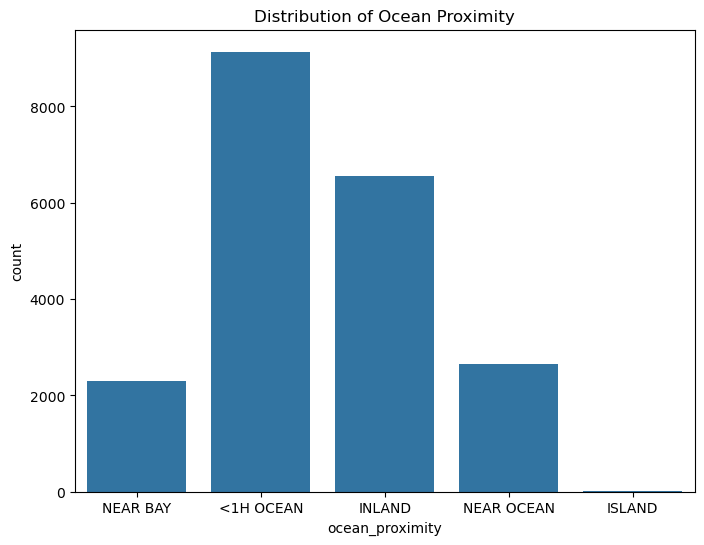

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=house, x='ocean_proximity')
plt.title('Distribution of Ocean Proximity')
plt.show()

In [15]:
correlation_matrix = house[['total_rooms', 'population', 'households', 'median_income', 'housing_median_age', 'median_house_value']].corr()
correlation_matrix

,total_rooms,population,households,median_income,housing_median_age,median_house_value
total_rooms,1.000000,0.857126,0.918484,0.198050,-0.361262,0.134153
population,0.857126,1.000000,0.907222,0.004834,-0.296244,-0.024650
households,0.918484,0.907222,1.000000,0.013033,-0.302916,0.065843
median_income,0.198050,0.004834,0.013033,1.000000,-0.119034,0.688075
housing_median_age,-0.361262,-0.296244,-0.302916,-0.119034,1.000000,0.105623
median_house_value,0.134153,-0.024650,0.065843,0.688075,0.105623,1.000000


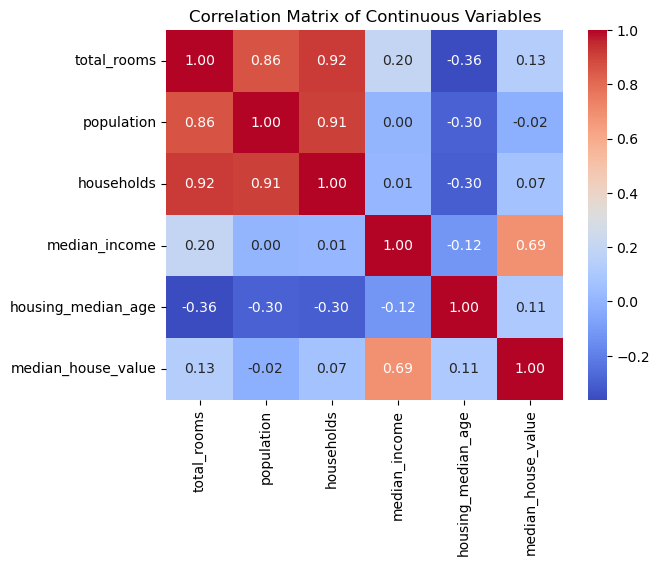

In [16]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

## Data Preprocessing

In [18]:
#missing values
house.dropna(subset=['total_bedrooms'], inplace=True)

In [19]:
house = pd.get_dummies(house, columns=['ocean_proximity'], drop_first=True)

In [20]:
#Featue Engineering
house['rooms_per_household'] = house['total_rooms'] / house['households']
house['bedrooms_per_room'] = house['total_bedrooms'] / house['total_rooms']
house['population_per_household'] = house['population'] / house['households']

In [21]:
#scaling
# Define numerical features (excluding the target variable)
numerical_features = house.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('median_house_value')  # Remove target variable

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
house[numerical_features] = scaler.fit_transform(house[numerical_features])


## Training and Testing

In [23]:
X = house.drop('median_house_value', axis=1)
y = house['median_house_value']

In [24]:
#80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (16346, 15)
X_test shape: (4087, 15)
y_train shape: (16346,)
y_test shape: (4087,)


In [25]:
print(house.isnull().sum())

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
rooms_per_household           0
bedrooms_per_room             0
population_per_household      0
dtype: int64


In [26]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,452600,False,False,True,False,0.625395,-1.146024,-0.049433
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,358500,False,False,True,False,0.324942,-0.987254,-0.092134
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,352100,False,False,True,False,1.150594,-1.440514,-0.025797
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,341300,False,False,True,False,0.155467,-0.492925,-0.050162
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,342200,False,False,True,False,0.342549,-0.706141,-0.085272


# Models

In [79]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Multiple Linear Regression

In [30]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [31]:
#evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score (y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [32]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean absolute Error: {mae}')

Mean Squared Error: 4766908188.84913
R^2 Score: 0.6514190003460656
Mean absolute Error: 49774.50536974606


## Ridge Regression

In [34]:
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train, y_train)
y_ridge_pred = ridge.predict(X_test)  #X_TRRAIN

In [35]:
y_ridge_train = ridge.predict(X_train)

In [36]:
mse_ridge_train = mean_squared_error(y_train, y_ridge_train)
r2_ridge_train = r2_score(y_train, y_ridge_train)
mae_ridge_train = mean_absolute_error(y_train, y_ridge_train)
print(f'Mean Squared Error_train: {mse_ridge_train}')
print(f'R^2 Score_train: {r2_ridge_train}')

Mean Squared Error_train: 4574760155.566859
R^2 Score_train: 0.6543928255676427


In [37]:
mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)
mae_ridge = mean_absolute_error(y_test, y_ridge_pred)

In [38]:
print(f'Mean Squared Error: {mse_ridge}')
print(f'R^2 Score: {r2_ridge}')
print(f'Mean absolute Error: {mae_ridge}')

Mean Squared Error: 4765917414.452269
R^2 Score: 0.6514914508980811
Mean absolute Error: 49771.59936467018


## K-Nearest Neighbors Regression

In [40]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)

In [41]:
mse_knn = mean_squared_error(y_test, y_knn_pred)
r2_knn = r2_score(y_test, y_knn_pred)
mae_knn = mean_absolute_error(y_test, y_knn_pred )

In [42]:
print(f'Mean Squared Error: {mse_knn}')
print(f'R^2 Score: {r2_knn}')
print(f'Mean absolute Error: {mae_knn}')

Mean Squared Error: 3722284230.2367997
R^2 Score: 0.7278073110350217
Mean absolute Error: 40694.73584536334


In [43]:
y_knn_train = knn.predict(X_train)
mse_knn_train = mean_squared_error(y_train, y_knn_train)
r2_knn_train = r2_score(y_train, y_knn_train)
mae_knn_train = mean_absolute_error(y_train, y_knn_train)
print(f'Mean Squared Error_train: {mse_knn_train}')
print(f'R^2 Score_train: {r2_knn_train}')

Mean Squared Error_train: 2435879961.6842823
R^2 Score_train: 0.8159777644758758


## Lasso Regression

In [45]:
lasso = LassoCV(alphas = [0.1, 1.0, 10.0], cv=5)
lasso.fit(X_train, y_train)
y_lasso_pred = lasso.predict(X_test)

In [46]:
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)
mae_lasso = mean_absolute_error(y_test, y_pred)

In [47]:
print(f'Mean Squared Error: {mse_lasso}')
print(f'R^2 Score: {r2_lasso}')
print(f'Mean absolute Error: {mae_lasso}')

Mean Squared Error: 4766078085.158419
R^2 Score: 0.6514797018244372
Mean absolute Error: 49774.50536974606


In [48]:
y_lasso_train = lasso.predict(X_train)
mse_lasso_train = mean_squared_error(y_train, y_lasso_train)
r2_lasso_train = r2_score(y_train, y_lasso_train)
mae_lasso_train = mean_absolute_error(y_train, y_lasso_train)
print(f'Mean Squared Error_train: {mse_lasso_train}')
print(f'R^2 Score_train: {r2_lasso_train}')

Mean Squared Error_train: 4574757386.855302
R^2 Score_train: 0.6543930347341445


## Random Forest Regression

In [50]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

In [51]:
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)
mae_rf = mean_absolute_error(y_test, y_pred)

In [52]:
print(f'Mean Squared Error: {mse_rf}')
print(f'R^2 Score: {r2_rf}')
print(f'Mean absolute Error: {mae_rf}')

Mean Squared Error: 2555973299.236541
R^2 Score: 0.8130940029806316
Mean absolute Error: 49774.50536974606


In [53]:
y_rf_model_train = rf_model.predict(X_train)

mse_rf_model_train = mean_squared_error(y_train, y_rf_model_train)
r2_rf_model_train = r2_score(y_train, y_rf_model_train)
mae_rf_model_train = mean_absolute_error(y_train, y_rf_model_train)
print(f'Mean Squared Error_train: {mse_rf_model_train}')
print(f'R^2 Score_train: {r2_rf_model_train}')

Mean Squared Error_train: 344404689.125419
R^2 Score_train: 0.9739814269115182


## Gradient Boosting Regression

In [55]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_gb_pred = gb_model.predict(X_test)

In [56]:
mse_gb = mean_squared_error(y_test, y_gb_pred)
r2_gb = r2_score(y_test, y_gb_pred)
mae_gb = mean_absolute_error(y_test, y_pred)

In [57]:
print(f'Mean Squared Error: {mse_gb}')
print(f'R^2 Score: {r2_gb}')
print(f'Mean absolute Error: {mae_gb}')

Mean Squared Error: 2937137783.8284307
R^2 Score: 0.7852212830103954
Mean absolute Error: 49774.50536974606


In [58]:
y_gb_model_train = gb_model.predict(X_train)

mse_gb_model_train = mean_squared_error(y_train, y_gb_model_train)
r2_gb_model_train = r2_score(y_train, y_gb_model_train)
mae_gb_model_train = mean_absolute_error(y_train, y_gb_model_train)
print(f'Mean Squared Error_train: {mse_gb_model_train}')
print(f'R^2 Score_train: {r2_gb_model_train}')

Mean Squared Error_train: 2573284639.969767
R^2 Score_train: 0.805597320255593


## XGBoost Regression

In [60]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_xgb_pred = xgb_model.predict(X_test)

In [61]:
mse_xgb = mean_squared_error(y_test, y_xgb_pred)
r2_xgb = r2_score(y_test, y_xgb_pred)
mae_xgb = mean_absolute_error(y_test, y_pred)

In [62]:
print(f' Mean Squared Error: {mse_xgb}')
print(f' R^2 Score: {r2_xgb}')
print(f'Mean absolute Error: {mae_xgb}')

 Mean Squared Error: 2310862993.802167
 R^2 Score: 0.8310177326202393
Mean absolute Error: 49774.50536974606


In [63]:
y_xgb_model_train = xgb_model.predict(X_train)

mse_xgb_model_train = mean_squared_error(y_train, y_xgb_model_train)
r2_xgb_model_train = r2_score(y_train, y_xgb_model_train)
mae_xgb_model_train = mean_absolute_error(y_train, y_xgb_model_train)
print(f'Mean Squared Error_train: {mse_xgb_model_train}')
print(f'R^2 Score_train: {r2_xgb_model_train}')

Mean Squared Error_train: 703376502.0700763
R^2 Score_train: 0.9468623399734497


## Decision Tree

In [65]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

In [66]:
mse_tree_reg = mean_squared_error(y_test, y_pred_tree)
r2_tree_reg= r2_score(y_test, y_pred_tree)
mae_tree_reg = mean_absolute_error(y_test, y_pred_tree)
print(f'Mean Squared Error_train: {mae_tree_reg}')
print(f'R^2 Score_train: {r2_tree_reg}')

Mean Squared Error_train: 43152.20406165892
R^2 Score_train: 0.663802515391607


# Coefficient and features

In [68]:
# For Linear Regression
coefficients = pd.Series(linear_reg.coef_, index=X.columns)
print("Linear Regression Coefficients:")
print(coefficients)

# For Ridge Regression
ridge_coefficients = pd.Series(ridge.coef_, index=X.columns)
print("Ridge Regression Coefficients:")
print(ridge_coefficients)

# For Lasso Regression
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
print("Lasso Regression Coefficients:")
print(lasso_coefficients)

Linear Regression Coefficients:
longitude                     -56839.941932
latitude                      -57164.265135
housing_median_age             13890.803224
total_rooms                     5083.439846
total_bedrooms                  5265.150244
population                    -44089.570646
households                     38842.099929
median_income                  78235.742249
ocean_proximity_INLAND        -34322.428122
ocean_proximity_ISLAND        208268.433908
ocean_proximity_NEAR BAY       -6462.127924
ocean_proximity_NEAR OCEAN      2870.007912
rooms_per_household             8494.734626
bedrooms_per_room              16887.634354
population_per_household         636.998362
dtype: float64
Ridge Regression Coefficients:
longitude                     -56838.265307
latitude                      -57163.220819
housing_median_age             13892.283829
total_rooms                     5084.604123
total_bedrooms                  5281.609551
population                    -44087.08521

In [69]:
# For Random Forest
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("Random Forest Feature Importances:")
print(rf_feature_importances.sort_values(ascending=False))

# For XGBoost
xgb_feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
print("XGBoost Feature Importances:")
print(xgb_feature_importances.sort_values(ascending=False))

Random Forest Feature Importances:
median_income                 0.477759
ocean_proximity_INLAND        0.138968
population_per_household      0.121088
longitude                     0.059274
latitude                      0.056498
housing_median_age            0.044412
rooms_per_household           0.026495
bedrooms_per_room             0.024660
total_rooms                   0.012719
population                    0.012197
total_bedrooms                0.011407
households                    0.010588
ocean_proximity_NEAR OCEAN    0.002865
ocean_proximity_NEAR BAY      0.000888
ocean_proximity_ISLAND        0.000181
dtype: float64
XGBoost Feature Importances:
ocean_proximity_INLAND        0.466779
median_income                 0.234838
ocean_proximity_ISLAND        0.069896
population_per_household      0.058035
ocean_proximity_NEAR BAY      0.029280
housing_median_age            0.023792
latitude                      0.023628
longitude                     0.023512
ocean_proximity_NEAR OCE

## Cross-Validation

In [71]:
from sklearn.model_selection import cross_val_score

cv_scores_linear = cross_val_score(linear_reg, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse_linear = -cv_scores_linear.mean()

print(f'Linear Regression - Cross-Validated MSE: {mean_cv_mse_linear}')

Linear Regression - Cross-Validated MSE: 5294106750.476924


In [72]:
tree_reg = DecisionTreeRegressor(random_state=42)

cv_scores_tree = cross_val_score(tree_reg, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse_tree = -cv_scores_tree.mean()

print(f'Decision Tree - Cross-Validated MSE: {mean_cv_mse_tree}')

Decision Tree - Cross-Validated MSE: 9084825086.741695


In [73]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse_rf = -cv_scores_rf.mean()

print(f'Random Forest - Cross-Validated MSE: {mean_cv_mse_rf}')

Random Forest - Cross-Validated MSE: 4899083300.728677


In [74]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

cv_scores_gb = cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse_gb = -cv_scores_gb.mean()

print(f'Gradient Boosting - Cross-Validated MSE: {mean_cv_mse_gb}')

Gradient Boosting - Cross-Validated MSE: 4336577183.890752


In [75]:
cv_scores_knn = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse_knn = -cv_scores_knn.mean()

print(f'KNN Regression - Cross-Validated MSE: {mean_cv_mse_knn}')

KNN Regression - Cross-Validated MSE: 5916107017.343259


In [76]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse_xgb = -cv_scores_xgb.mean()

print(f'XGBoost - Cross-Validated MSE: {mean_cv_mse_xgb}')

XGBoost - Cross-Validated MSE: 4207931045.5173354


## Hyperparameter Tuning 

In [81]:
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],       
    'max_depth': [10, 20, 30, None],           
    'min_samples_split': [10, 20, 50, 100],    
    'min_samples_leaf': [5, 10, 20, 50],       
    'bootstrap': [True, False]                 
}

random_search_rf = RandomizedSearchCV(estimator=rf_model, 
                                      param_distributions=param_grid_rf, 
                                      n_iter=10,                      
                                      cv=3,                           
                                      scoring='neg_mean_squared_error', 
                                      n_jobs=-1,                      
                                      verbose=2,                      
                                      random_state=42)

random_search_rf.fit(X_train, y_train)

print(f'Best params for Random Forest: {random_search_rf.best_params_}')

best_rf_model = random_search_rf.best_estimator_
y_rf_pred = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)
mae_rf = mean_absolute_error(y_test, y_rf_pred)
print(f"Random Forest - MSE: {mse_rf}, R^2: {r2_rf}, MAE: {mae_rf}")

param_grid_gb = {
    'n_estimators': [100, 200, 300],           
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   
    'max_depth': [3, 5, 7, 10],                
    'subsample': [0.8, 1.0],                   
    'min_samples_split': [10, 20, 50],         
    'min_samples_leaf': [5, 10, 20]            
}

random_search_gb = RandomizedSearchCV(estimator=gb_model, 
                                      param_distributions=param_grid_gb, 
                                      n_iter=10,                     # Try 10 parameter combinations
                                      cv=3,                          # 3-fold cross-validation
                                      scoring='neg_mean_squared_error', 
                                      n_jobs=-1,                     # Use all available cores
                                      verbose=2,                     # Show progress
                                      random_state=42)


random_search_gb.fit(X_train, y_train)

print(f'Best params for Gradient Boosting: {random_search_gb.best_params_}')

best_gb_model = random_search_gb.best_estimator_
y_gb_pred = best_gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_gb_pred)
r2_gb = r2_score(y_test, y_gb_pred)
mae_gb = mean_absolute_error(y_test, y_gb_pred)
print(f"Gradient Boosting - MSE: {mse_gb}, R^2: {r2_gb}, MAE: {mae_gb}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for Random Forest: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 30, 'bootstrap': True}
Random Forest - MSE: 2580040810.3582463, R^2: 0.8113340619971634, MAE: 32835.227755921806
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for Gradient Boosting: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 50, 'min_samples_leaf': 20, 'max_depth': 7, 'learning_rate': 0.1}
Gradient Boosting - MSE: 2117902221.769241, R^2: 0.8451280275629038, MAE: 29946.48409284981


In [83]:
# Evaluate Random Forest with the best parameters
best_rf_model = random_search_rf.best_estimator_
y_rf_pred = best_rf_model.predict(X_test)

# Evaluate Gradient Boosting with the best parameters
best_gb_model = random_search_gb.best_estimator_
y_gb_pred = best_gb_model.predict(X_test)

# Calculate metrics (MSE, R^2, MAE)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Random Forest Performance
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)
mae_rf = mean_absolute_error(y_test, y_rf_pred)

print(f"Random Forest - MSE: {mse_rf}, R^2: {r2_rf}, MAE: {mae_rf}")

# Gradient Boosting Performance
mse_gb = mean_squared_error(y_test, y_gb_pred)
r2_gb = r2_score(y_test, y_gb_pred)
mae_gb = mean_absolute_error(y_test, y_gb_pred)

print(f"Gradient Boosting - MSE: {mse_gb}, R^2: {r2_gb}, MAE: {mae_gb}")


Random Forest - MSE: 2580040810.3582463, R^2: 0.8113340619971634, MAE: 32835.227755921806
Gradient Boosting - MSE: 2117902221.769241, R^2: 0.8451280275629038, MAE: 29946.48409284981


In [87]:
 # Lasso Regression Hyperparameter Tuning
param_grid_lasso = {
    'alphas': [[0.01, 0.1, 1, 10, 100]]  # A list of alphas for LassoCV
}

random_search_lasso = RandomizedSearchCV(estimator=LassoCV(), 
                                         param_distributions=param_grid_lasso, 
                                         n_iter=5, 
                                         cv=3, 
                                         scoring='neg_mean_squared_error', 
                                         n_jobs=-1, 
                                         verbose=2, 
                                         random_state=42)

# Fit the Lasso model with random search
random_search_lasso.fit(X_train, y_train)
print(f'Best params for Lasso: {random_search_lasso.best_params_}')

# ------------------------------------------------
# Lasso Regression Evaluation
# ------------------------------------------------
best_lasso_model = random_search_lasso.best_estimator_
y_lasso_pred = best_lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)
mae_lasso = mean_absolute_error(y_test, y_lasso_pred)

print(f"Lasso Regression - MSE: {mse_lasso}, R^2: {r2_lasso}, MAE: {mae_lasso}")


D:\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best params for Lasso: {'alphas': [0.01, 0.1, 1, 10, 100]}
Lasso Regression - MSE: 4766078085.158419, R^2: 0.6514797018244372, MAE: 49771.92234149039


In [89]:
param_grid_ridge = {
    'alphas': [[0.01, 0.1, 1, 10, 100]]  # Regularization strength in RidgeCV must be a list of values
}

random_search_ridge = RandomizedSearchCV(estimator=RidgeCV(), 
                                         param_distributions=param_grid_ridge, 
                                         n_iter=5, 
                                         cv=3, 
                                         scoring='neg_mean_squared_error', 
                                         n_jobs=-1, 
                                         verbose=2, 
                                         random_state=42)

random_search_ridge.fit(X_train, y_train)
print(f'Best params for Ridge: {random_search_ridge.best_params_}')

# Ridge Regression Evaluation
best_ridge_model = random_search_ridge.best_estimator_
y_ridge_pred = best_ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)
mae_ridge = mean_absolute_error(y_test, y_ridge_pred)
print(f"Ridge Regression - MSE: {mse_ridge}, R^2: {r2_ridge}, MAE: {mae_ridge}")

D:\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best params for Ridge: {'alphas': [0.01, 0.1, 1, 10, 100]}
Ridge Regression - MSE: 4766804121.997073, R^2: 0.6514266102529243, MAE: 49774.20631872844
